In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from pandas import DataFrame
from pandas import Series

In [5]:
# initial AWS bucket dataset
df_ws = pd.DataFrame.from_csv('title.principals.tsv',sep='\t')

In [8]:
nullActors = float((df_ws['principalCast'] == '\\N').sum())
print("Percentage titles missing actor: ", nullActors/len(df_ws))

Percentage titles missing actor:  0.0


In [2]:
# read in data
local_file="title.ratings.genresG.actorsS.csv"
source=local_file
df = pd.read_csv(source, sep='\t')

In [4]:
df.head()

,Unnamed: 0,tconst,principalCast,titleType,primaryTitle,runtimeMinutes,genres,averageRating,numVotes
0,0,tt0000009,nm0085156,movie,Miss Jerry,45.0,Romance,5.4,58.0
1,1,tt0000009,nm0183823,movie,Miss Jerry,45.0,Romance,5.4,58.0
2,2,tt0000009,nm0063086,movie,Miss Jerry,45.0,Romance,5.4,58.0
3,3,tt0000009,nm1309758,movie,Miss Jerry,45.0,Romance,5.4,58.0
4,4,tt0000147,nm0280615,movie,The Corbett-Fitzsimmons Fight,20.0,"Documentary,News,Sport",5.2,236.0


In [9]:
len(df)

1634240

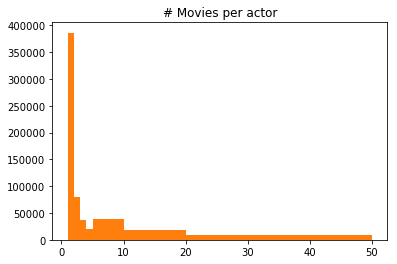

count    592502.000000
mean          2.757888
std           5.858132
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         263.000000
Name: movieCount, dtype: float64

In [63]:
# mpp_df: number of movies per principal
mpp_df= df.loc[:,['tconst','principalCast']].groupby('principalCast').count().rename(columns={'tconst': 'movieCount'})

plt.title("# Movies per actor")
bins = [1,2,3,4,5,10,20,50]
plt.hist(mpp_df.movieCount, bins = bins)
plt.savefig('movies_actor.png')
plt.show()
mpp_df.movieCount.describe()

In [12]:
a = mpp_df.movieCount[mpp_df.movieCount > 1.0].count()
print("Actors in more than one movie: ",a)

Actors in more than one movie:  206339


In [13]:
print("Descriptive statistics for ratings of all actors")
df.loc[:,['principalCast', 'averageRating']].groupby('principalCast').mean().averageRating.describe()

Descriptive statistics for ratings of all actors


count    592502.000000
mean          6.299094
std           1.316897
min           1.000000
25%           5.550000
50%           6.400000
75%           7.200000
max          10.000000
Name: averageRating, dtype: float64

In [14]:
print("Descriptive statistics for ratings of actors > 1 movie")
# average ratings
df2 = df.loc[df.duplicated(subset='principalCast', keep=False), :]
df2.loc[:,['principalCast', 'averageRating']].groupby('principalCast').mean().averageRating.describe()

Descriptive statistics for ratings of actors > 1 movie


count    206339.000000
mean          6.191699
std           0.961417
min           1.000000
25%           5.640000
50%           6.266667
75%           6.811438
max           9.823333
Name: averageRating, dtype: float64

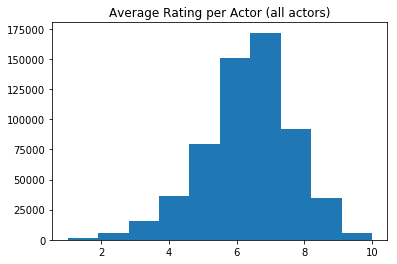

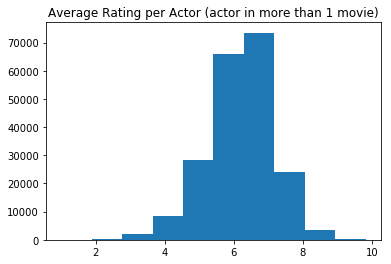

In [9]:
plt.title("Average Rating per Actor (all actors)")
plt.hist(df.loc[:,['principalCast', 'averageRating']].groupby('principalCast').mean().averageRating)
plt.show()

plt.title("Average Rating per Actor (actor in more than 1 movie)")
plt.hist(df2.loc[:,['principalCast', 'averageRating']].groupby('principalCast').mean().averageRating)
plt.show()

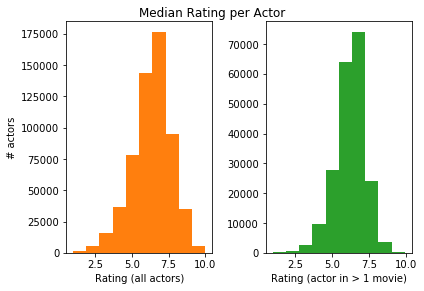

In [61]:
plt.subplot(1,2,2)
plt.hist(df2.loc[:,['principalCast', 'averageRating']].groupby('principalCast').median().averageRating)
plt.xlabel("Rating (actor in > 1 movie)")
#plt.show()
plt.tight_layout()

plt.tight_layout()
plt.suptitle('Median Rating per Actor', horizontalalignment = 'center', y = 1.0)
plt.show()
# plt.savefig('median_actor.png')

In [11]:
def modStats(model):
    modParams=model.params
    modAOVTable = sm.stats.anova_lm(model, typ=2)
    modSummary=model.summary()
    return(modParams, modAOVTable, modSummary)

def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


actor ratings have good mean and median distributions<br>
sample of 200k instances: actors who have been in 2 or more movie<br>

Need to look at how to define top 20 actors:<br>
top 20 with ratings between x and y? <br>
top 20 in movies with more than x votes? <br> 
actors in the most movies? <br>
top 20 by decade? <br>